In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from GomokuTools import GomokuTools, N_9x9
#from GomokuBoard import GomokuBoard
from FastGomokuBoard import FastGomokuBoard as GomokuBoard
from HeuristicScore import HeuristicScore

---
# The Gomoku Board

In [3]:
A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T,U = \
    1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20

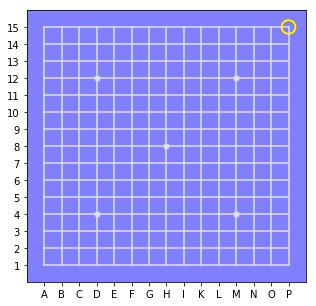

In [4]:
board=GomokuBoard(15, 5)
board.display()

---
### Visualizing threats and opportunities

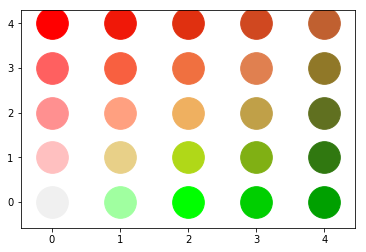

In [5]:
for d in range(4, -1, -1):
    for o in range(5):
        plt.scatter([o], [d], color=board.color_scheme[o][d], s=1000)

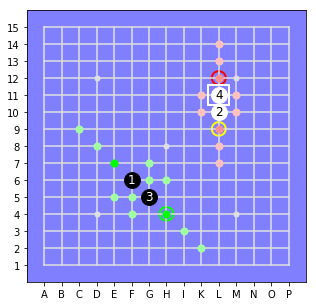

In [6]:
board = GomokuBoard(15, 5, [(F,6), (L,10), (G,5), (L,11)], 
                    HeuristicScore(kappa0=1.5, kappa1 = 5))
board.display(score='current');

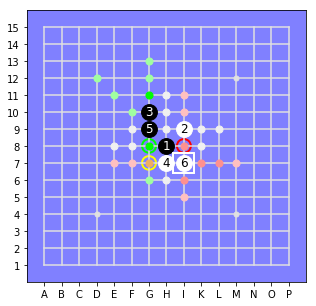

In [7]:
board = GomokuBoard(15, 5, [(H,8), (I,9), (G,10), (H,7), (G, 9), (I,7)])
board.display(score='current');

The board chooses the color automatically.

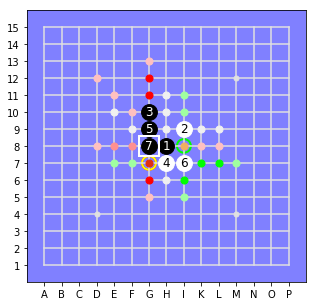

In [8]:
board.set(G,8)
board.display()

Undo the last move:

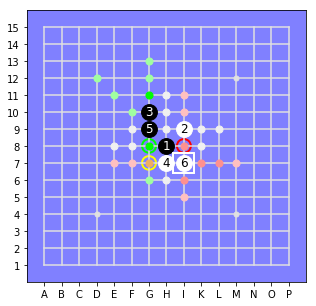

In [9]:
board.undo()
board.display()

---
Winding the game forward and backward.

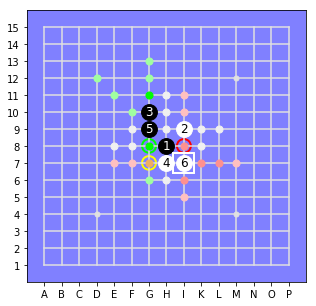

In [10]:
board = GomokuBoard(15, 5, [(H,8), (I,9), (G,10), (H,7), (G, 9), (I,7)])
board.display()

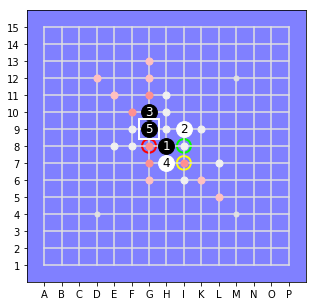

In [11]:
board = GomokuBoard(15, 5, [(H,8), (I,9), (G,10), (H,7), (G, 9), (I,7)])
board.bwd()
board.display()

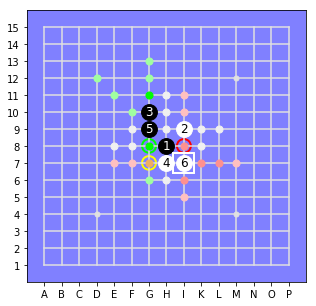

In [12]:
board.fwd()
board.display()

In [13]:
game = pd.read_csv('3_11_3_2.psq', header=None)
# originally 20x20 data, but fits on a 15x15, if we shift it a bit to the left
game = game - [5,0] 

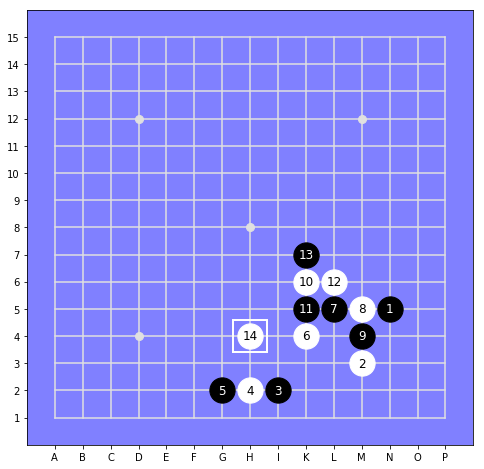

In [14]:
stones = game.values.tolist()
board = GomokuBoard(15, 8, stones)
board.bwd(20).display(score=None)

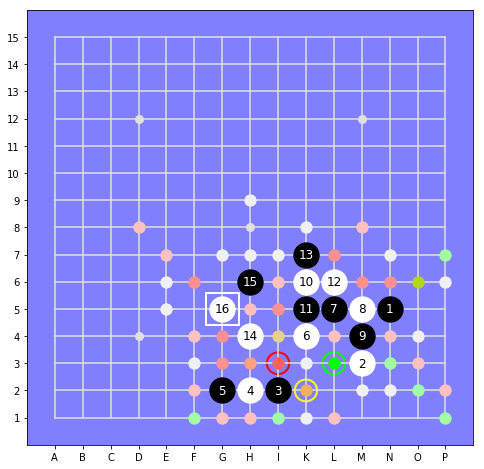

In [17]:
board.fwd(2).display();

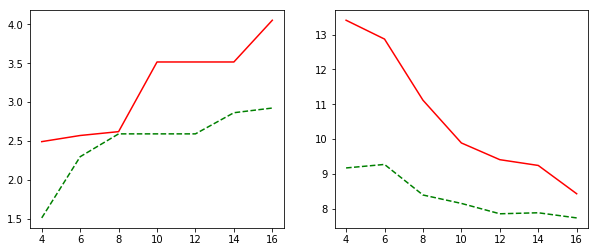

In [16]:
n = (board.cursor+1)
data = pd.DataFrame(board.stats[1])
figure, axes = plt.subplots(1,2, figsize=(10, 4))
axes[0].plot(range(4, n+2, 2), data['max_o'][2:n//2+1], 'g--', 
         range(4, n+2, 2), data['max_d'][2:n//2+1], 'r' );
axes[1].plot(range(4, n+2, 2), data['avg_o'][2:n//2+1], 'g--', 
         range(4, n+2, 2), data['avg_d'][2:n//2+1], 'r' );

In [17]:
pd.DataFrame(board.stats[1])

,avg_d,avg_o,gsum_d,gsum_o,max_d,max_o
0,29.646896,0.000000,0,0,1.245731,0.000000
1,17.126726,9.019467,0,0,1.694507,1.245731
2,13.145294,8.694477,0,0,2.491462,1.624505
3,12.991474,8.488235,0,0,2.743518,2.297397
4,10.711123,7.598744,0,0,2.920084,2.785539
5,9.773237,7.286804,0,0,3.767636,2.785539
6,9.408904,7.209371,0,0,3.767636,2.798192
7,9.386903,7.484055,0,0,3.767636,3.290878
8,8.422759,7.240787,0,0,4.280129,3.290878
9,8.648925,7.421296,0,0,4.280129,3.446095
